In [71]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np

## Create Tensors

In [108]:
A = qu.randn(4)
print(A)
print(A.reshape(2,2))

[ 0.54135207 -0.31025589  0.53110948 -1.45657471]
[[ 0.54135207 -0.31025589]
 [ 0.53110948 -1.45657471]]


Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET']), backend='numpy', dtype='complex128')


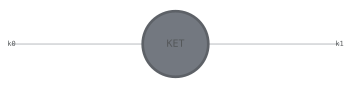

In [102]:
data = qu.bell_state('psi-').reshape(2, 2)
inds = ('k0','k1')
tags = ('KET')

ket = qtn.Tensor(data=data, inds=inds, tags=tags)
print(ket)
ket.draw()

In [80]:
X = qtn.Tensor(qu.pauli('X'), inds=('k0', 'b0'), tags=['PAULI', 'X', '0'])
Y = qtn.Tensor(qu.pauli('Y'), inds=('k1', 'b1'), tags=['PAULI', 'Y', '1'])

bra = qtn.Tensor(qu.rand_ket(4).reshape(2, 2), inds=('b0', 'b1'), tags=['BRA'])

## Create tensor networks

In [155]:
TN = ket.H & X & Y & bra ## ket.H is conjugating the data of ket (does nothing to indices)
## Can also use TensorNetwork constructor
print(TN)

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', 'k1'), tags=oset(['KET'])),
    Tensor(shape=(2, 2), inds=('k0', 'b0'), tags=oset(['PAULI', 'X', '0'])),
    Tensor(shape=(2, 2), inds=('k1', 'b1'), tags=oset(['PAULI', 'Y', '1'])),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['BRA'])),
], tensors=4, indices=4)


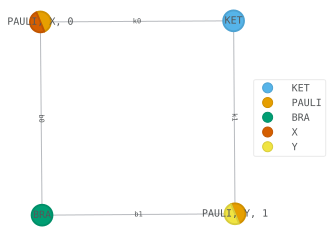

In [118]:
TN.draw(color=['KET', 'PAULI', 'BRA', 'X', 'Y'], figsize=(4, 4), show_inds='all')

##  Create graph-oriented TN

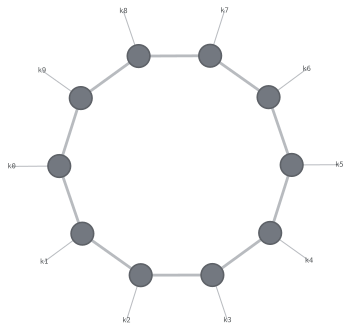

In [121]:
# Making a small periodic matrix product state with bond dimension 7
L = 10

# create the nodes, by default just the scalar 1.0
tensors = [qtn.Tensor() for _ in range(L)]

for i in range(L):
    # add the physical indices, each of size 2
    tensors[i].new_ind(f'k{i}', size=2)

    # add bonds between neighbouring tensors, of size 7
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)

mps = qtn.TensorNetwork(tensors)
mps.draw()


In [135]:
## Contract everything
TN ^ ...

(-0.22555320605143458-0.27012734173492536j)

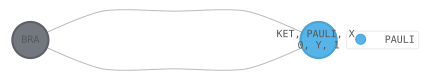

TensorNetwork([
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['BRA'])),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags=oset(['KET', 'PAULI', 'X', '0', 'Y', '1'])),
], tensors=2, indices=2)


In [139]:
## Contract tensors with a specific set of tags
TNc = TN ^ ['PAULI','KET']
TNc.draw('PAULI')
print(TNc)

In [143]:
## @ is the shorthand 'matmul' operator that directly contracts 2 tensors
ta = qtn.rand_tensor([2, 3], inds=['a', 'x'], tags='A')
tb = qtn.rand_tensor([4, 3], inds=['b', 'x'], tags='B')

# matrix multiplication but with indices aligned automatically
ta @ tb

Tensor(shape=(2, 4), inds=('a', 'b'), tags=oset(['A', 'B']))

0.9999999999999996


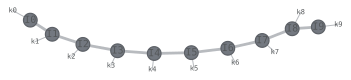

In [193]:
# get a normalized tensor network
psi = qtn.MPS_rand_state(10, 7)

# compute its norm squared
print(psi.H @ psi)  # == (tn.H & tn) ^ ...
psi.draw()

TensorNetwork([
    Tensor(shape=(7, 2), inds=('_12de91AAAHc', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHc', '_12de91AAAHd', 'k1'), tags=oset(['I1'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHd', '_12de91AAAHe', 'k2'), tags=oset(['I2'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHe', '_12de91AAAHf', 'k3'), tags=oset(['I3'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHf', '_12de91AAAHg', 'k4'), tags=oset(['I4'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHg', '_12de91AAAHh', 'k5'), tags=oset(['I5'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHh', '_12de91AAAHi', 'k6'), tags=oset(['I6'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHi', '_12de91AAAHj', 'k7'), tags=oset(['I7'])),
    Tensor(shape=(7, 7, 2), inds=('_12de91AAAHj', '_12de91AAAHk', 'k8'), tags=oset(['I8'])),
    Tensor(shape=(7, 2), inds=('_12de91AAAHk', 'k9'), tags=oset(['I9'])),
    Tensor(shape=(7, 2), inds=('_12de91AAAJg', 'k0'), tags=oset(['I0'])),
    Tensor(shape=(

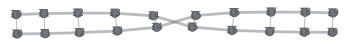

In [191]:
tn = qtn.TensorNetwork(psi)
print(tn & tn.H)
print( (tn & tn.H) ^ ...)
(tn & tn.H).draw()


## Decomposition

### Split tensors

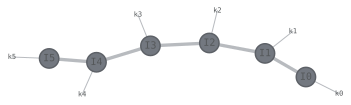

In [256]:
psi = qtn.MPS_rand_state(6, 10)
psi.draw()

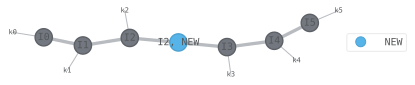

In [294]:
psi.split_tensor(
    # identify the tensor
    tags='I2',
    # here we give the right indices
    left_inds=None,
    right_inds=[psi.bond(2, 3)],
    # a new tag for the right factor
    rtags='NEW',
)

psi.draw('NEW')

### Gauging

[[[ 0.28509857  0.50552922 -1.15959131  1.84310265]
  [ 1.31589484 -0.22182307  1.00614235  0.35778391]
  [-0.42241224 -1.27869317 -0.63506927 -1.32421505]
  [ 0.42190308  2.16521571 -1.48615924 -0.64370827]]

 [[ 0.15135774  0.50210559 -0.70950625 -1.86145958]
  [-0.66342281 -0.63172534  1.42086793  1.27728254]
  [-0.26311336 -0.29232222  0.88776399 -0.19814815]
  [ 1.43397778 -0.14865763 -0.40980639  0.10615553]]

 [[-0.47408064 -0.56110547  0.1957156  -0.31688727]
  [ 0.40027282 -0.37578999  0.20337058  0.30178935]
  [ 0.03485776  0.83084709 -0.89559477  0.45218404]
  [ 1.26237257  0.25548886  0.59947416  1.67764517]]

 [[ 1.17807623 -2.59497302  1.02338633  0.14944423]
  [ 0.60012138  0.36928982  0.2507761  -0.28409534]
  [ 0.41544963  0.22805417 -0.94525437 -0.01387343]
  [-0.8169928  -0.41816535  1.51560451  1.09317633]]]


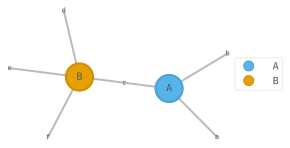

In [340]:
ta = qtn.rand_tensor([4, 4, 4], ['a', 'b', 'c'], 'A')
tb = qtn.rand_tensor([4, 4, 4, 4], ['c', 'd', 'e', 'f'], 'B')
print(ta.data)
#qtn.tensor_canonize_bond(ta, tb)

(ta | tb).draw(['A', 'B'], figsize=(4, 4), show_inds='all')

[[[ 0.09335855  0.12969657 -0.28314407  0.66125343]
  [ 0.43090371 -0.0464828   0.3401431  -0.14344526]
  [-0.13832337 -0.32589485 -0.47004261 -0.13853441]
  [ 0.13815664  0.54971605 -0.07297207 -0.15089157]]

 [[ 0.0495637   0.12786442 -0.13743966 -0.47253114]
  [-0.21724483 -0.16429555  0.33389623  0.23467001]
  [-0.08615926 -0.07570801  0.23321528 -0.16072723]
  [ 0.46957122 -0.02715588 -0.11671709  0.00432043]]

 [[-0.15524273 -0.14509569 -0.05704177 -0.04186056]
  [ 0.13107358 -0.09198119  0.01051866  0.05484302]
  [ 0.01141454  0.21002046 -0.14141481  0.20742769]
  [ 0.41337727  0.07363929  0.29255293  0.26924884]]

 [[ 0.38577354 -0.6466414  -0.10919549  0.00180036]
  [ 0.19651611  0.09757906  0.17464503 -0.19918181]
  [ 0.13604338  0.06058426 -0.2594944   0.10309891]
  [-0.26753295 -0.11148823  0.40095746  0.1594128 ]]]


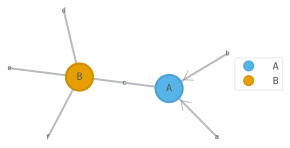

In [342]:
qtn.tensor_canonize_bond(ta, tb)
print(ta.data)
(ta & tb).draw(['A', 'B'], figsize=(4, 4), show_inds='all')

In [324]:
### Compressing

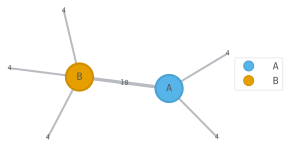

In [326]:
ta = qtn.rand_tensor([4, 4, 10], ['a', 'b', 'c'], 'A')
tb = qtn.rand_tensor([10, 4, 4, 4], ['c', 'd', 'e', 'f'], 'B')
(ta | tb).draw(['A', 'B'], figsize=(4, 4), show_inds='bond-size')

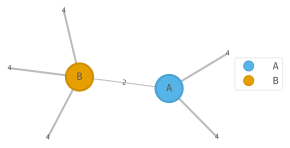

In [348]:
# perform the compression
qtn.tensor_compress_bond(ta, tb, max_bond=2, absorb='both')

# should now see the bond has been reduced in size to 2
(ta | tb).draw(['A', 'B'], figsize=(4, 4), show_inds='bond-size')